This Datacamp project is "Will This Customer Purchase Your Product" the purpose of this project is to:
* Identify the purchase rates for online shopping session by customer type for the months of Nov and Dec.
* Identify the strongetst correlation in total time spent among page types by returning customers in Nov and Dec.
* Lastly there is a new campaign for returning customers that will boost the purchase rate by 15%. The analyst is to identify the likelihood of achieving at least 100 sales out of 500 online shopping sessions.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Read in the data
shopping_data = pd.read_csv('data/online_shopping_session_data.csv')
# View the data
shopping_data.head()

,SessionID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Month,CustomerType,Purchase
0,1,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
1,2,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,False,Feb,Returning_Customer,0.0
2,3,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
3,4,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,False,Feb,Returning_Customer,0.0
4,5,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,True,Feb,Returning_Customer,0.0


In [3]:
# Subset the dataframe for Nov and Dec
shopping_Nov_Dec = shopping_data[shopping_data['Month'].isin(['Nov','Dec'])]

# View the results
shopping_Nov_Dec.head()

# Verify there is only unique data in the 'Month' column
print(shopping_Nov_Dec['Month'].unique())

['Nov' 'Dec']


In [4]:
# Get session frequency stats by CustomerType and Purchase
count_session = shopping_Nov_Dec.groupby(['CustomerType'])['Purchase'].value_counts()
print(count_session)

CustomerType        Purchase
New_Customer        0.0          529
                    1.0          199
Returning_Customer  0.0         2994
                    1.0          728
Name: count, dtype: int64


In [18]:
# Total number of session by CustomerType
total_new_customer = np.sum(count_session['New_Customer'])
total_returning_customer = np.sum(count_session['Returning_Customer'])

In [19]:
# Total number of purchase by CustomerType
purchase_new_customer = count_session[('New_Customer', 1)]
purchase_returning_customer = count_session[('Returning_Customer', 1)]

In [23]:
# Calculate the purchasing rates
purchase_rate_new = purchase_new_customer / total_new_customer
purchase_rate_returning = purchase_returning_customer / total_returning_customer
# View the results
print(purchase_rate_new)
print(purchase_rate_returning)

0.2733516483516483
0.1955937667920473


In [24]:
# Calculate the purchase rates
purchase_rates = {"Returning_Customer": purchase_rate_returning, "New_Customer": purchase_rate_new}
print(purchase_rates)

{'Returning_Customer': np.float64(0.1955937667920473), 'New_Customer': np.float64(0.2733516483516483)}


In [25]:
# Identify the strongest correlation in total tme spent between different types of pages visted by returning customers during the months of Nov and Dec
# Use Scipy pearsonr function
cor_admin_info = stats.pearsonr(shopping_Nov_Dec['Administrative_Duration'], shopping_Nov_Dec['Informational_Duration'])

In [27]:
# Store top correlation
top_correlation = {"pair": ('Administrative_Duration', 'ProductRelated_Duration'), "correlation": cor_admin_info}
print(top_correlation)

{'pair': ('Administrative_Duration', 'ProductRelated_Duration'), 'correlation': PearsonRResult(statistic=np.float64(0.24468855792839214), pvalue=np.float64(1.1351596218133316e-61))}


In [28]:
# Purchase is a binomial random variable taking the value of either 0 or 1
print("Current purchase rate for the returning customer:", purchase_rate_returning)

Current purchase rate for the returning customer: 0.1955937667920473


In [29]:
# 15% Increase in this rate would be
increased_purchase_rate_returning = 1.15 * purchase_rate_returning
print("Increased purchase rate for the returning customer:", increased_purchase_rate_returning)

Increased purchase rate for the returning customer: 0.22493283181085436


In [30]:
# First, we find the likelihood of having <100 sales of 500 sessions
# Find this from binomial cdf
prob_sales_100_less = stats.binom.cdf(k=100, n=500, p=increased_purchase_rate_returning)
print("probability of having <100 sales:", prob_sales_100_less)

probability of having <100 sales: 0.09877786609627338


In [31]:
# Then, to find the probability of having 100 or more sales is 1-prob_sales_100_less
prob_at_least_100_sales = 1 - prob_sales_100_less
print("probability of having at least 100 sales:", prob_at_least_100_sales)

probability of having at least 100 sales: 0.9012221339037266


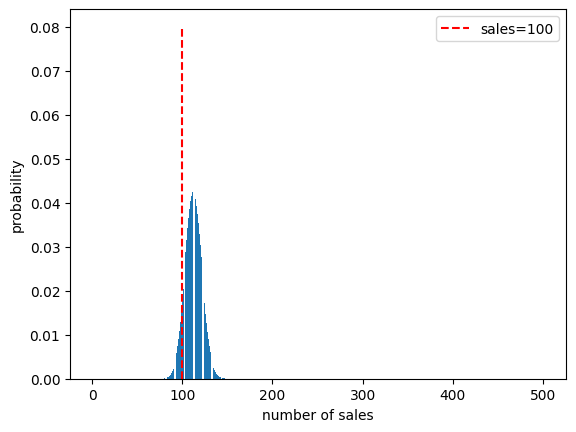

In [32]:
# Plotting the binomial probability distribution
n_sessions = 500
k_values = np.arange(500) + 1
p_binom_values = [stats.binom.pmf(k, n_sessions, increased_purchase_rate_returning) for k in k_values ] 
plt.bar(k_values, p_binom_values) 
plt.vlines(100, 0, 0.08, color='r', linestyle='dashed', label="sales=100")
plt.xlabel("number of sales")
plt.ylabel("probability")
plt.legend()
plt.show()